## Graded Assignment 1 - Karapanar (s2733250)

In [128]:
#loading the necessary packages
import os
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import scipy.spatial.distance as ssd
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#clone the corpus with using git clone
#!git clone https://github.com/andreanini/jacktherippercorpus.git

#get to the cloned directory
#!cd jacktherippercorpus

In [130]:
#access the file called corpus and create lists to store the txt file names and content
dir = 'jacktherippercorpus/corpus'  
letters = []
letter_names = []

for file in os.listdir(dir):
    if file.endswith(".txt"):
        with open(os.path.join(dir, file), 'r', encoding='ISO-8859-1') as raw:
            r_letter = raw.read()
            letters.append(r_letter)
            letter_names.append(file)

In [131]:
#after looking at the contents of the letters, there are several preprocessing steps that can be taken
#for these steps the function preprocess is created
def preprocess(text):
    # lowercase
    text = text.lower()
    
    # remove '[illegible]' 
    text = re.sub(r'\[illegible\]', '', text)
    
    # remove '[?]' from the text
    text = re.sub(r'\[\?\]', '', text)

    # handle expressions like 'great[er]' and turn them into single expressions
    text = re.sub(r'\[(.*?)\]', r'\1', text)
    
    #filter out non alphanumeric tokens
    text_words = [token for token in word_tokenize(text) if token.isalnum()]
    
    preprocessed_text = ' '.join(text_words)
    
    return preprocessed_text


In [132]:
#apply the function to the letters
letters_preprocessed = [preprocess(letter) for letter in letters]

### Bigram Distances with TF-IDF Vectorizer

In [133]:
#the paper it only mentions bigrams so I used n_gram range = (2,2) 
#in KMeans after investigating the elbow graph the letters are divided into four groups (but depending on the first selected points) and only two groups in hierarchical clustering
#but when n_gram range = (1,2) is used (both unigrams and bigrams are used), both KMeans (but depending on the first selected points) and clustering divides the letters into four groups

#initialize the tfidf vectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range = (2,2), use_idf=True)

#fit the vectorizer
tfidf_matrix = vectorizer_tfidf.fit_transform(letters_preprocessed)

#calculate bigram distances with euclidean distances
bigram_distance_tfidf = euclidean_distances(tfidf_matrix)

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

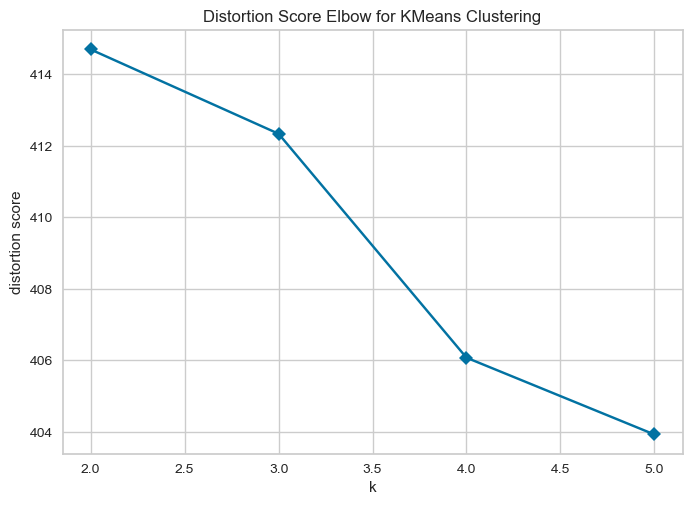

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
# create KMeans model
np.random.seed(42)

model = KMeans(random_state=42)

# create KElbowVisualizer with KMeans model
visualizer = KElbowVisualizer(model, k = (2,6), timings = False, locate_elbow = False)

# Fit the visualizer with bigram distances
visualizer.fit(bigram_distance_tfidf)

visualizer.show()

In [135]:
km = KMeans(n_clusters = 4) 
clusters = km.fit_predict(bigram_distance_tfidf) 

#printing the name of the each letter and the cluster it is assigned to
for x in range(len(letter_names)):
    print(letter_names[x], clusters[x])

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


JR_191188_4.txt 2
UNK_041088.txt 2
JR_221188.txt 1
JR_220789_2.txt 2
JR_191188_5.txt 2
JR_311088.txt 1
MH_241188_2.txt 0
JR_121188_3.txt 1
JR_211288.txt 2
JR_191088_2.txt 2
JR_240789.txt 1
BB_281188.txt 2
JM_110989.txt 2
JR_271188_2.txt 1
JR_071088.txt 1
JR_171088.txt 1
JR_280989.txt 0
JR_071089.txt 1
UNK_221088.txt 2
JR_211188_4.txt 2
JR_121188_2.txt 1
JR_280190.txt 2
JC_161188.txt 0
JR_160989.txt 2
JC_051088.txt 0
JW_141188.txt 1
JR_161088.txt 1
JR_151188.txt 1
JR_051188.txt 2
JR_250789.txt 1
JR_191188_2.txt 2
UNK_161088 - FROM HELL.txt 0
JR_191188_3.txt 1
JR_161089.txt 1
IM_270491.txt 0
JR_291088.txt 2
JR_211188_3.txt 2
JR_301089.txt 2
JR_231188.txt 1
JR_071089_2.txt 0
JR_201088.txt 1
JC_080189.txt 2
JR_211188_2.txt 0
JR_121188_4.txt 2
JR_300989.txt 2
JR_071188.txt 1
JR_171188.txt 1
JR_151088_2.txt 2
JR_041088.txt 2
JR_UNK_9.txt 2
JR_040989.txt 1
JR_201088_3.txt 1
JR_070889.txt 0
JB_150189.txt 1
JR_180789.txt 0
JR_201088_2.txt 2
JJ_191088.txt 2
JR_151188_6.txt 2
JR_UNK_8.txt 2
UNK_3

/var/folders/8p/tfttmv8n3g34725p_r5jvgxc0000gn/T/ipykernel_72700/301986279.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  ward = linkage(bigram_distance_tfidf, method = 'ward')


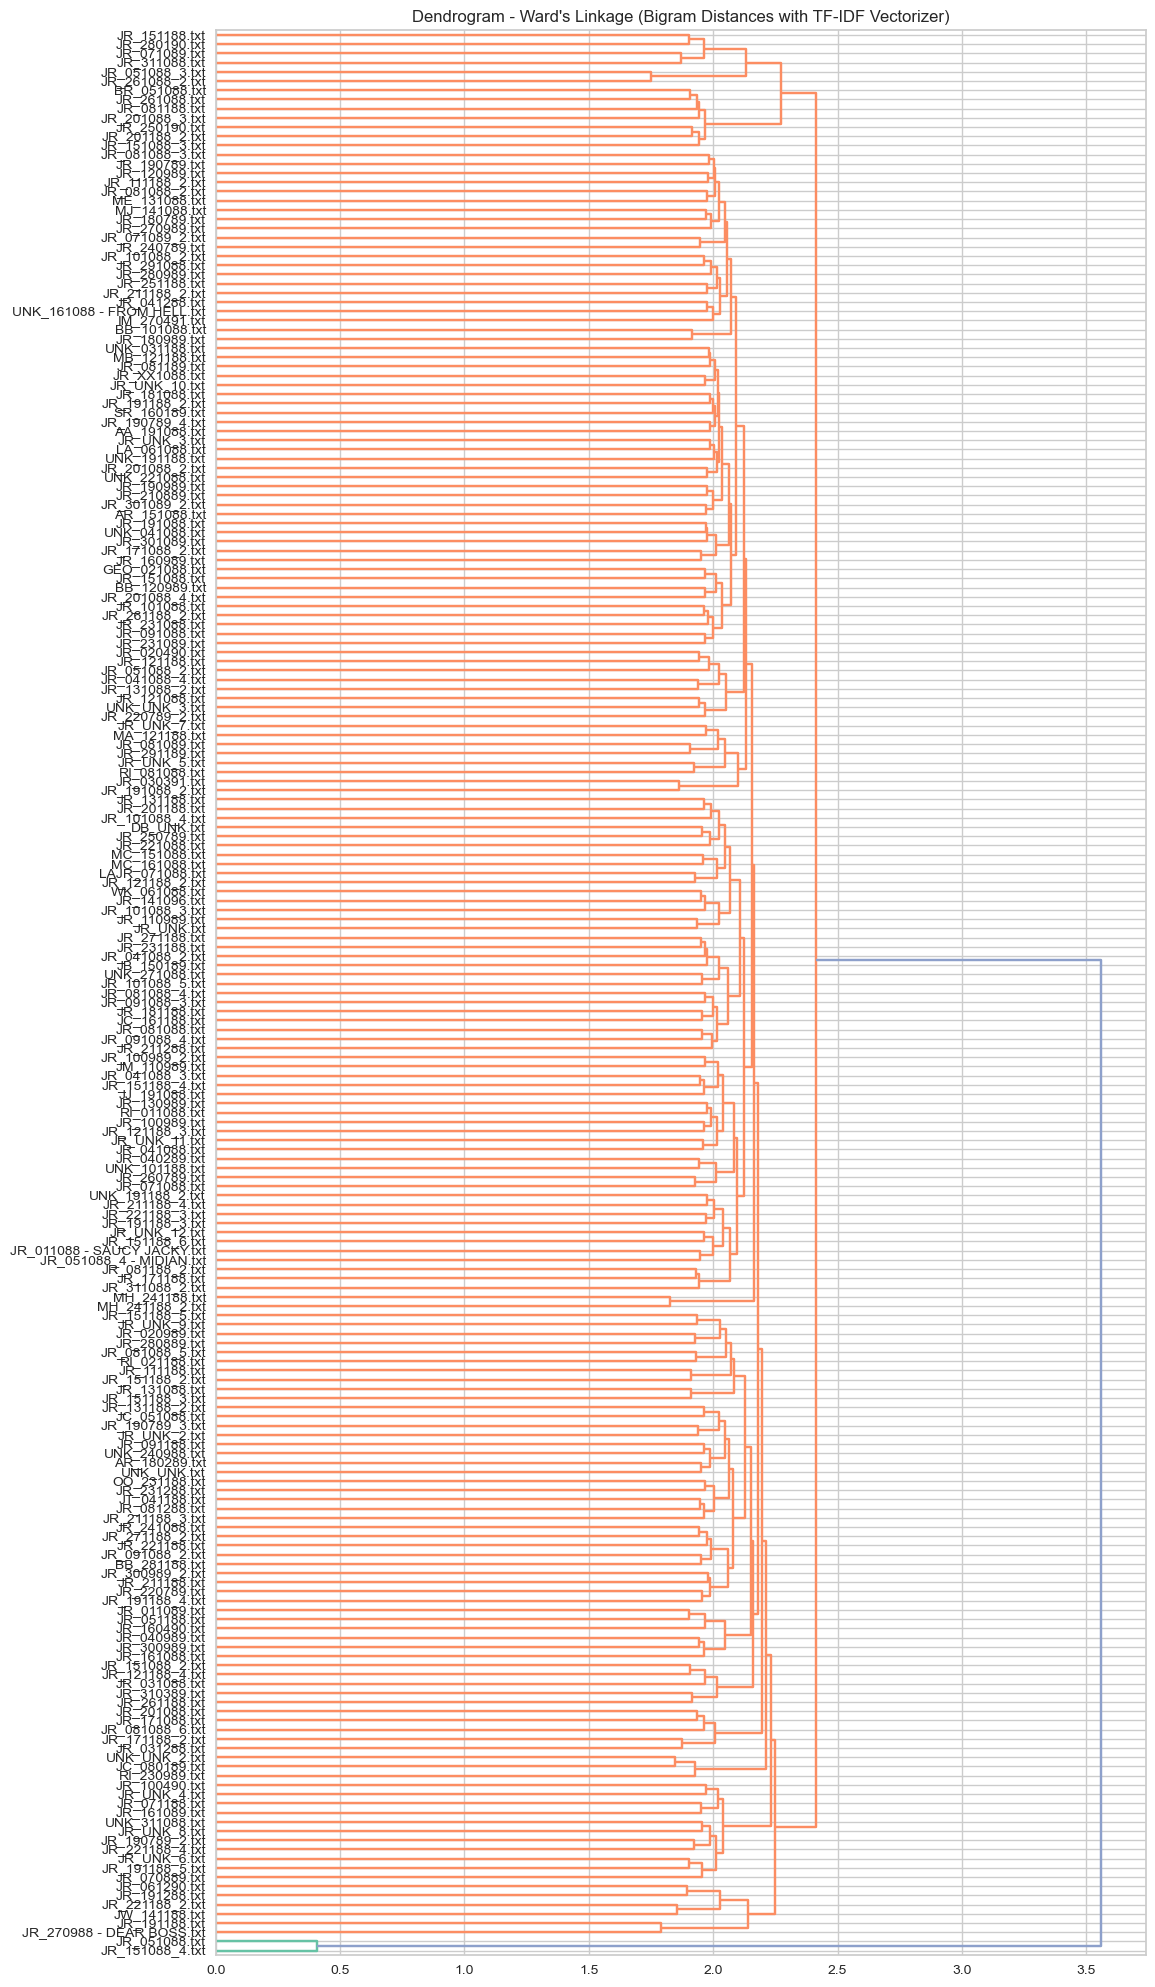

In [136]:
#setting a colour palette for easier readability
hierarchy.set_link_color_palette(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3'])

ward = linkage(bigram_distance_tfidf, method = 'ward')

#visualize
plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0, above_threshold_color = '#8da0cb')
plt.title("Dendrogram - Ward's Linkage (Bigram Distances with TF-IDF Vectorizer)")

plt.savefig('dn_bigram_tfidf.png')
plt.show()

### Bigram Distances with Count Vectorizer

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

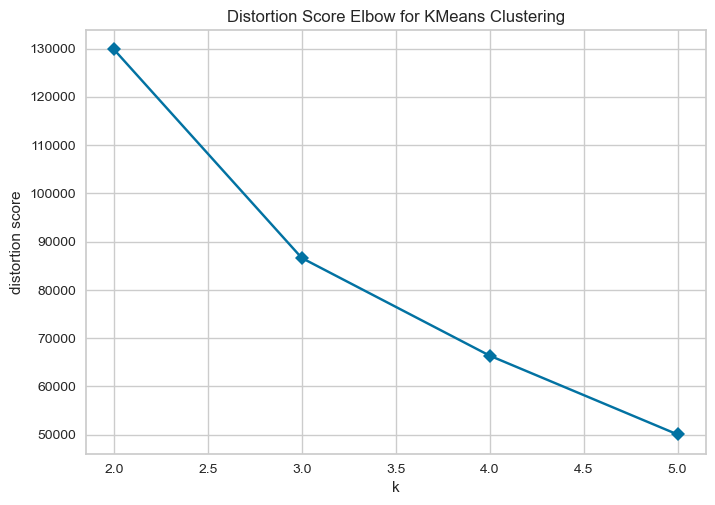

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [137]:
#since the paper has not specified which vectorizer has been used, I have decided to use both of them
#with n_gram range = (2,2) 3 clusters in KMeans and 2 in hierarchical clustering
#with n_gram range = (1,2) 3 clusters in KMeans and 3 in hierarchical clustering but one of the clusters only have one letter

#initialize the count vectorizer
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2, 2))

#fit the vectorizer                            
count_matrix = vectorizer.fit_transform(letters_preprocessed)

#calculate bigram distances with euclidean distances
bigram_distance_count = euclidean_distances(count_matrix)

#create Kmeans model
model = KMeans()

# create KElbowVisualizer with the model
visualizer = KElbowVisualizer(model, k = (2,6), timings = False, locate_elbow = False)

# fit it with the above calculated bigram distances according to the count vectorizer
visualizer.fit(bigram_distance_count)

visualizer.show()

In [138]:
km = KMeans(n_clusters = 3) 
clusters = km.fit_predict(bigram_distance_count) 

for x in range(len(letter_names)):
    print(letter_names[x], clusters[x])

JR_191188_4.txt 0
UNK_041088.txt 1
JR_221188.txt 0
JR_220789_2.txt 0
JR_191188_5.txt 1
JR_311088.txt 1
MH_241188_2.txt 1
JR_121188_3.txt 0
JR_211288.txt 1
JR_191088_2.txt 1
JR_240789.txt 1
BB_281188.txt 0
JM_110989.txt 0
JR_271188_2.txt 0
JR_071088.txt 1
JR_171088.txt 1
JR_280989.txt 1
JR_071089.txt 1
UNK_221088.txt 1
JR_211188_4.txt 1
JR_121188_2.txt 1
JR_280190.txt 1
JC_161188.txt 0
JR_160989.txt 1
JC_051088.txt 1
JW_141188.txt 0
JR_161088.txt 1
JR_151188.txt 1
JR_051188.txt 1
JR_250789.txt 2
JR_191188_2.txt 0
UNK_161088 - FROM HELL.txt 1
JR_191188_3.txt 0
JR_161089.txt 0
IM_270491.txt 1
JR_291088.txt 0
JR_211188_3.txt 0
JR_301089.txt 1
JR_231188.txt 1
JR_071089_2.txt 1
JR_201088.txt 1
JC_080189.txt 1
JR_211188_2.txt 1
JR_121188_4.txt 1
JR_300989.txt 1
JR_071188.txt 2
JR_171188.txt 0
JR_151088_2.txt 0
JR_041088.txt 2
JR_UNK_9.txt 0
JR_040989.txt 1
JR_201088_3.txt 1
JR_070889.txt 0
JB_150189.txt 1
JR_180789.txt 0
JR_201088_2.txt 0
JJ_191088.txt 0
JR_151188_6.txt 0
JR_UNK_8.txt 0
UNK_3

/Users/aylinkarapanar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


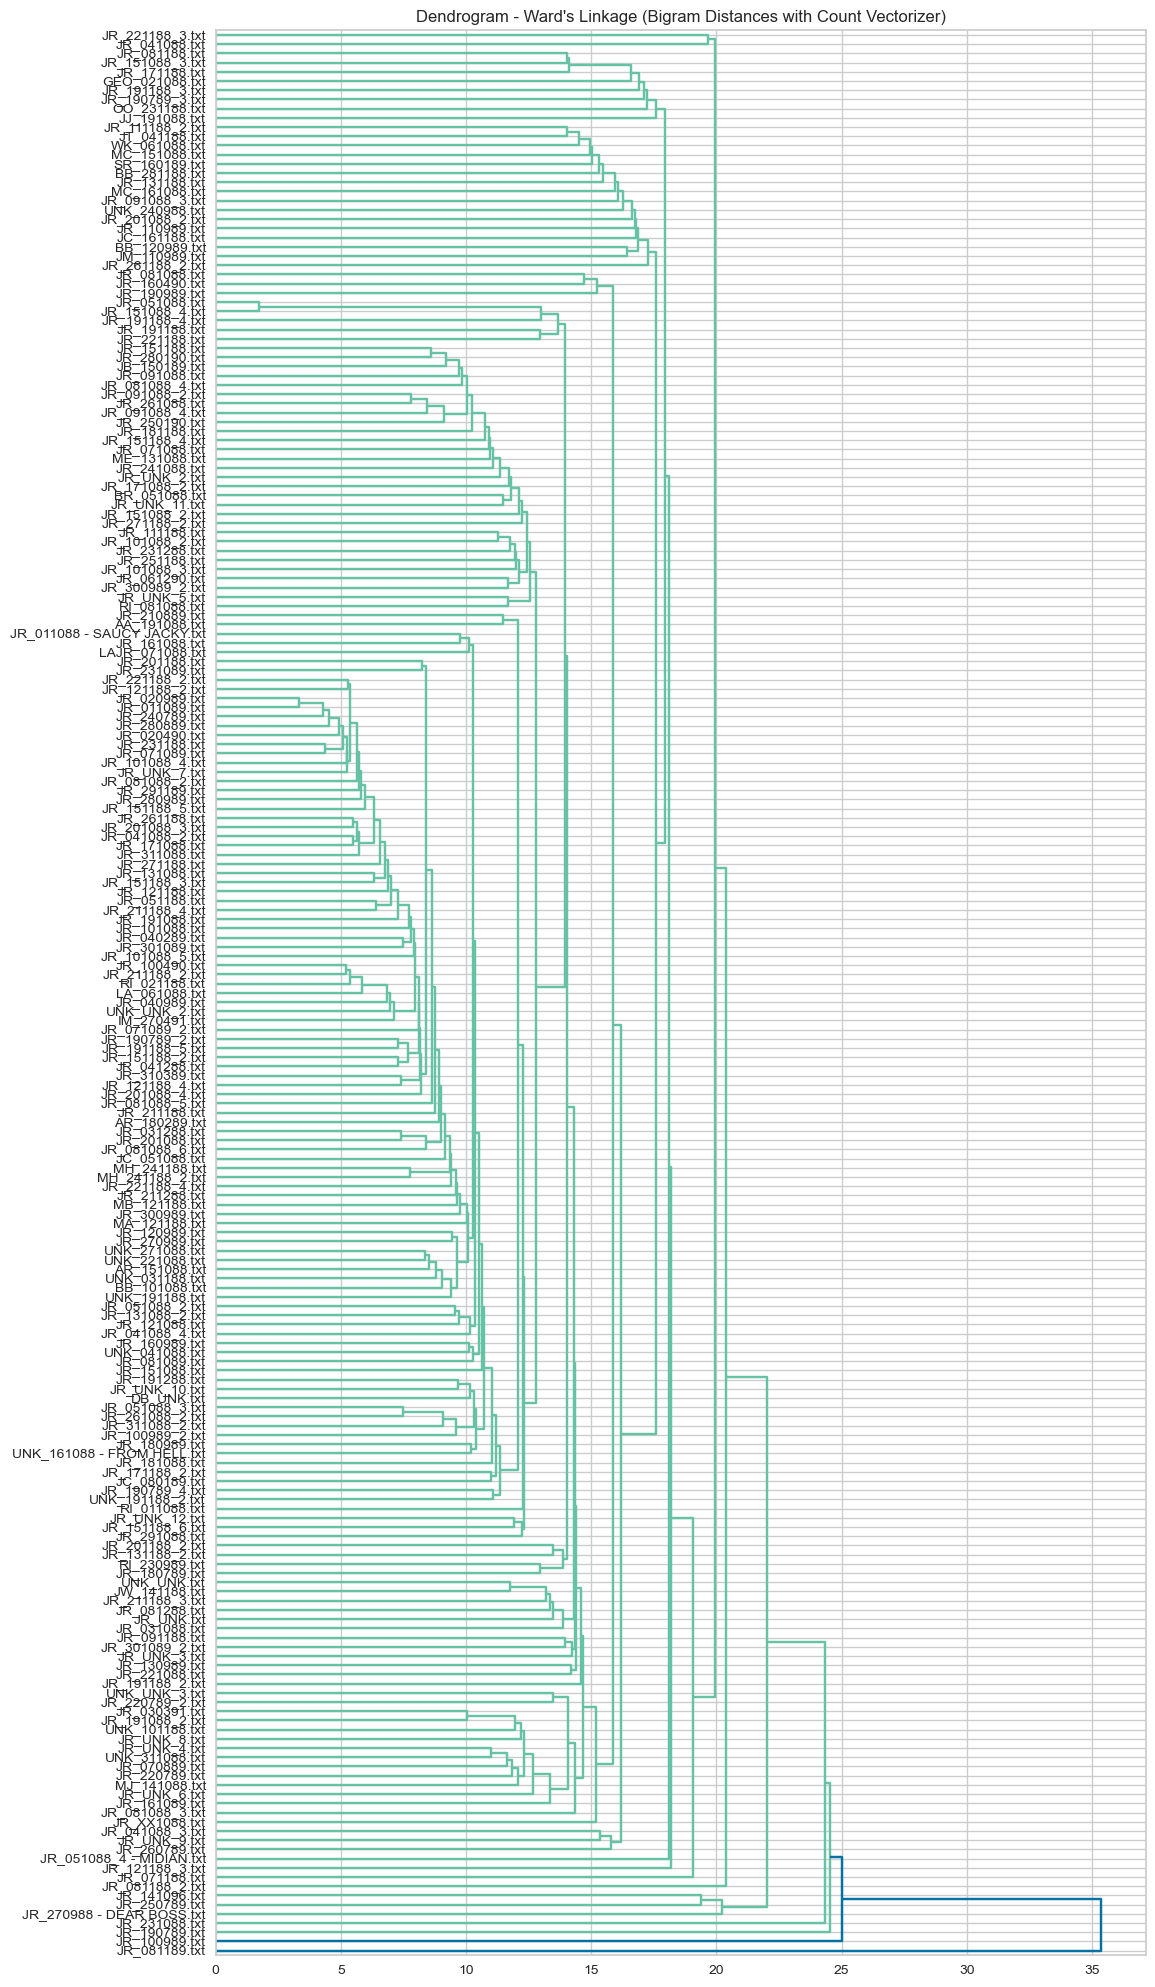

In [139]:
#turning the square form matrix to vector form
dist_matrix = ssd.squareform(bigram_distance_count)
ward = linkage(dist_matrix, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0)
plt.title("Dendrogram - Ward's Linkage (Bigram Distances with Count Vectorizer)")
plt.savefig('dn_bigram_count.png')
plt.show()

### Bigram Distances with Count Vectorizer and Jaccard Distances

In [140]:
#when ngram_range = (2, 2), hierarchical clustering yields 2 clusters
#with ngram_range = (1, 2), hierarchical clustering yields 3 clusters

#excluding the bigrams from the letters as described by the author
excluded_bigrams = ['i am', 'i have', 'i will', 'dear boss', 'jack the', 'I shall', 'yours truly']

#changing the stop_wrods with the excluded bugrams so that it can be entered into the vectorizer
stop_words = [word for word in excluded_bigrams if word not in stopwords.words('english')] 

# initialize CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (2, 2), stop_words = 'english')

# fit the letters
count_matrix = vectorizer.fit_transform(letters_preprocessed)

count_array = count_matrix.toarray()

jaccard_distance = []

# calculate Jaccard distances for each pair of documents
for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(count_array[i], count_array[j], average = 'macro')
        jaccard_distance.append(1 - jaccard)

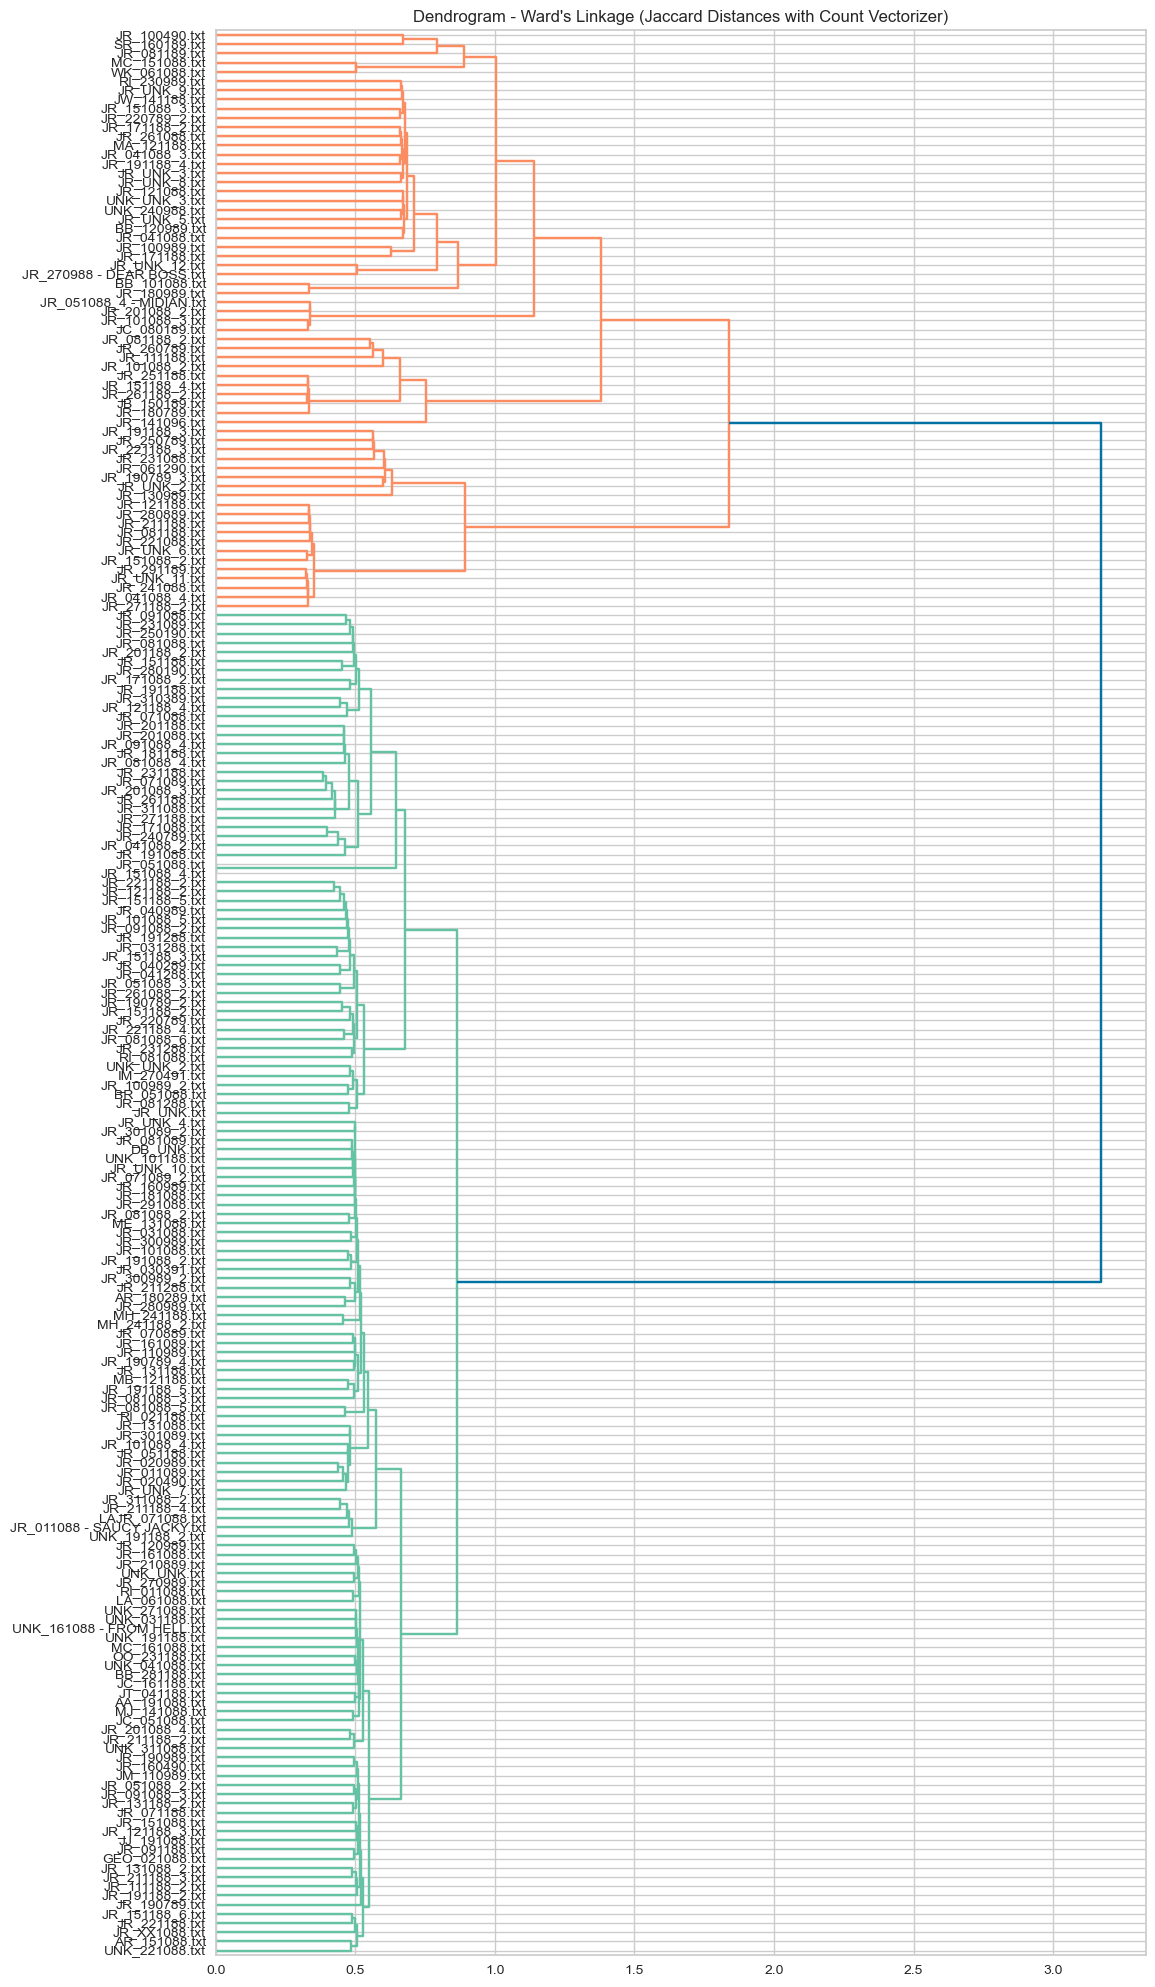

In [141]:
#convert the list to array to create the distance matrix
distance_matrix = np.array(jaccard_distance)

ward = linkage(distance_matrix, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0)
plt.title("Dendrogram - Ward's Linkage (Jaccard Distances with Count Vectorizer)")
plt.savefig('dn_jaccard_count.png')
plt.show()

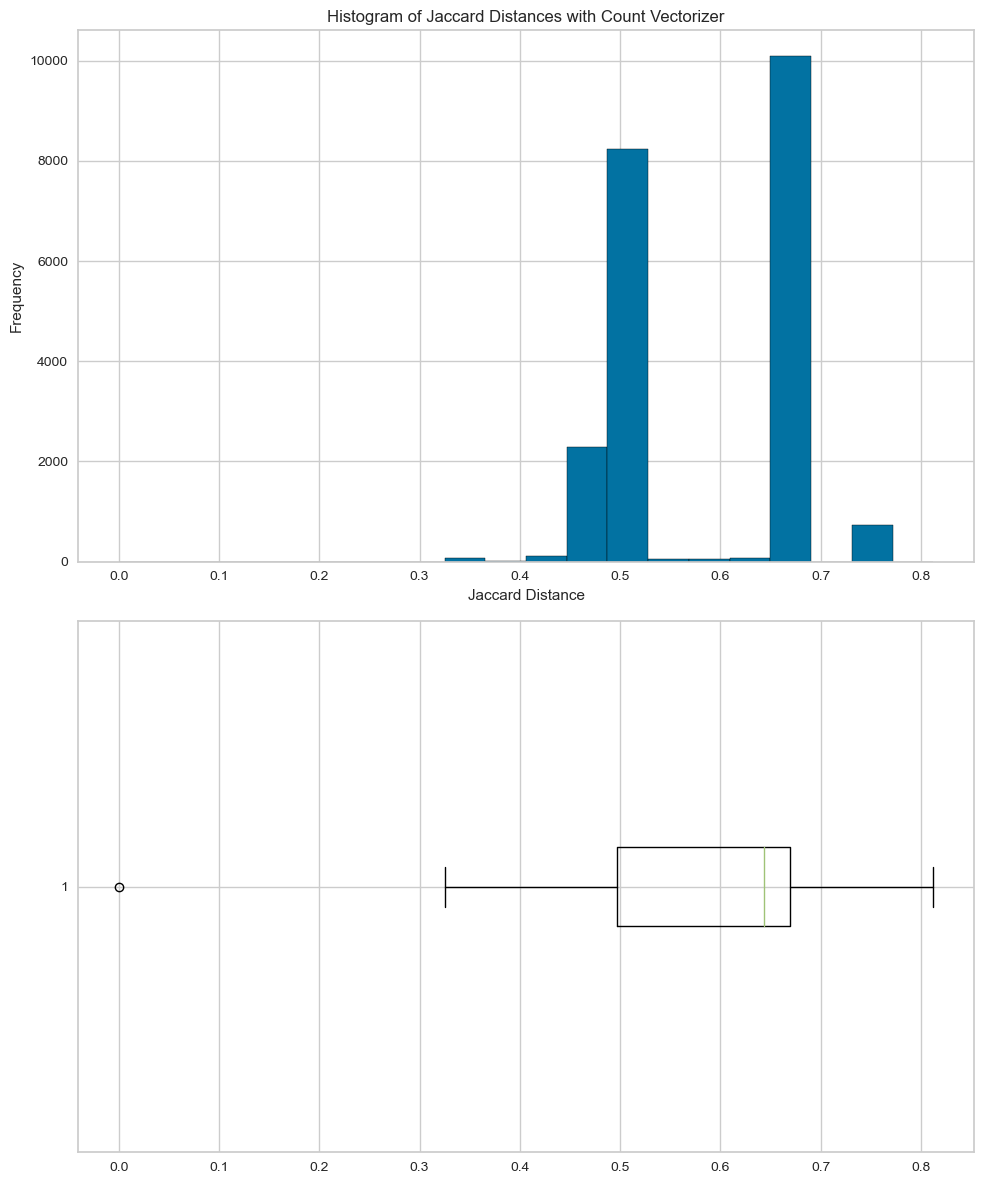

In [142]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Histogram and boxplot showing the distribution of Jaccard distance values
ax[0].hist(distance_matrix, bins=20, edgecolor='black')
ax[0].set_title('Histogram of Jaccard Distances with Count Vectorizer')
ax[0].set_xlabel('Jaccard Distance')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)

ax[1].boxplot(distance_matrix, vert=False)
ax[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.savefig('frequency_jaccard_count.png')
plt.show()


### Bigram Distances with TF-IDF Vectorizer and Jaccard Vectorizer

In [143]:
#with ngram_range = (2, 2), hierarchical clustering yields 5 clusters
#with ngram_range = (1, 2), hierarchical clustering yields 3 clusters

#excluding the bigrams from the letters as described by the author
excluded_bigrams = ['i am', 'i have', 'i will', 'dear boss', 'jack the', 'I shall', 'yours truly']

#changing the stop_wrods with the excluded bugrams so that it can be entered into the vectorizer
stop_words = [word for word in excluded_bigrams if word not in stopwords.words('english')] 

# initialize TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), stop_words = 'english')

# fit the letters
tfidf_matrix = vectorizer.fit_transform(letters_preprocessed)

# round the values to 4 decimals but even there are values with more than four decimals
tfidf_matrix_rounded = np.round(tfidf_matrix.toarray(), decimals=4)

# use binarizer to turn the values into binary
binarizer = Binarizer()
tfidf_matrix_binarized = binarizer.fit_transform(tfidf_matrix_rounded)

jaccard_distance = []

# calculate Jaccard distances for each pair of documents
for i in range(len(letters_preprocessed)):
    for j in range(i + 1, len(letters_preprocessed)):
        jaccard = jaccard_score(tfidf_matrix_binarized[i], tfidf_matrix_binarized[j], average='macro')
        jaccard_distance.append(1 - jaccard)

[0.5039395929087327, 0.4988838267753881, 0.4994078695342855, 0.49181980275893145, 0.4907014447545559, 0.49250077527864433, 0.5042783833570059, 0.49430049478336735, 0.4940223280249548, 0.4880030324393754, 0.5058273145108338, 0.50231506547854, 0.4973590646035133, 0.4955862865586228, 0.4880030324393754, 0.4907014447545559, 0.4894416662599227, 0.5036933683519369, 0.47663987555094633, 0.4889842025575074, 0.49457112006365, 0.5079612606697308, 0.49534186056924523, 0.5041858174655285, 0.5046782665791202, 0.49457112006365, 0.49373615806526194, 0.48987937336363396, 0.4989326765188834, 0.5073046618516086, 0.5044320420223243, 0.4988838267753881, 0.4973590646035133, 0.5032829940906106, 0.4977599836818356, 0.4977599836818356, 0.4907014447545559, 0.4885052888336422, 0.49430049478336735, 0.49313776517149477, 0.4955862865586228, 0.5031188443860801, 0.49313776517149477, 0.49457112006365, 0.5028605269065433, 0.4990610444783793, 0.4975613452382456, 0.5036474053774169, 0.5007071464317292, 0.491460859503873

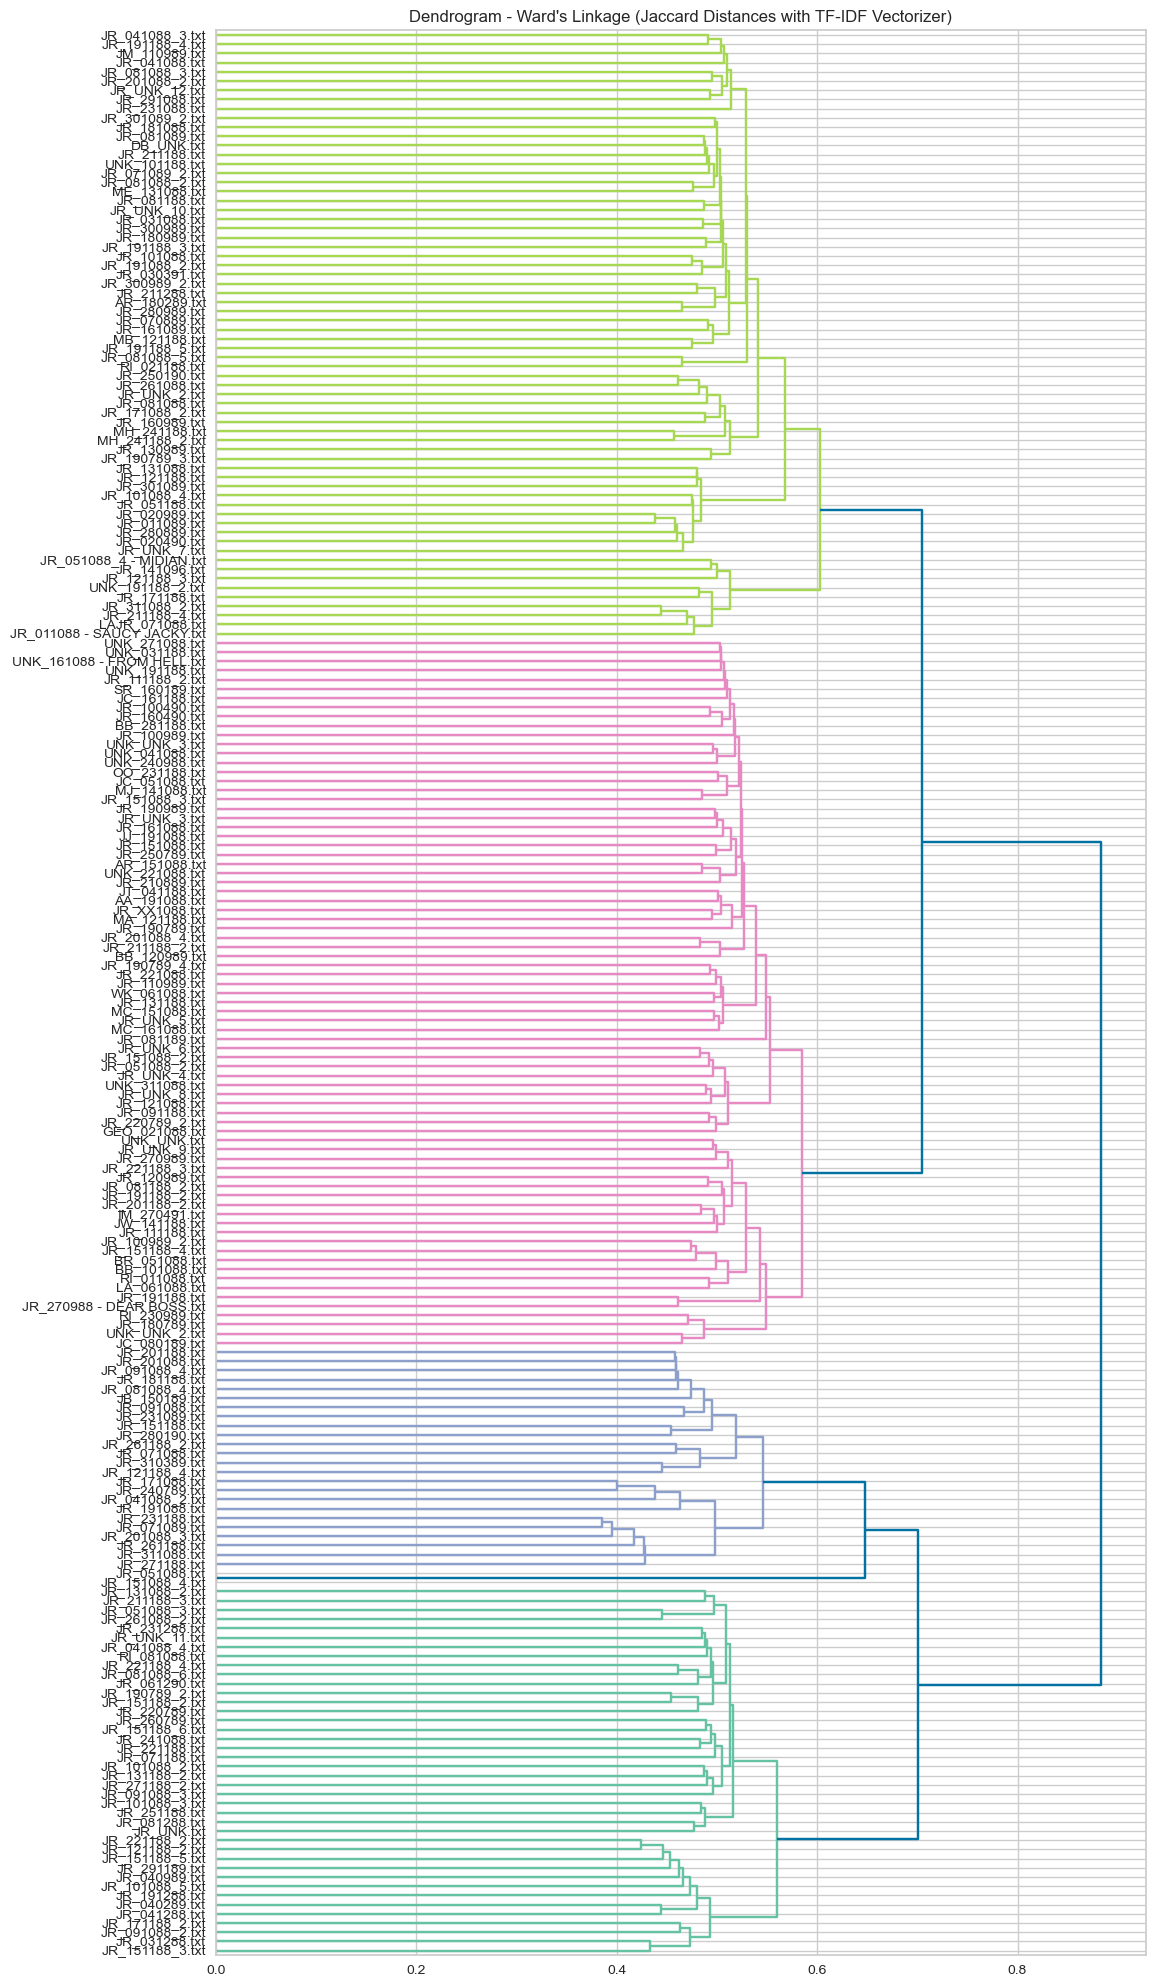

In [144]:
#convert the list to array to create the distance matrix
distance_matrix = np.array(jaccard_distance)

ward = linkage(distance_matrix, method = 'ward')

plt.figure(figsize = (12, 25))
dendrogram(ward, labels = letter_names, orientation = "right", leaf_font_size = 10, leaf_rotation = 0)
plt.title("Dendrogram - Ward's Linkage (Jaccard Distances with TF-IDF Vectorizer)")
plt.savefig('dn_jaccard_tfidf.png')
plt.show()

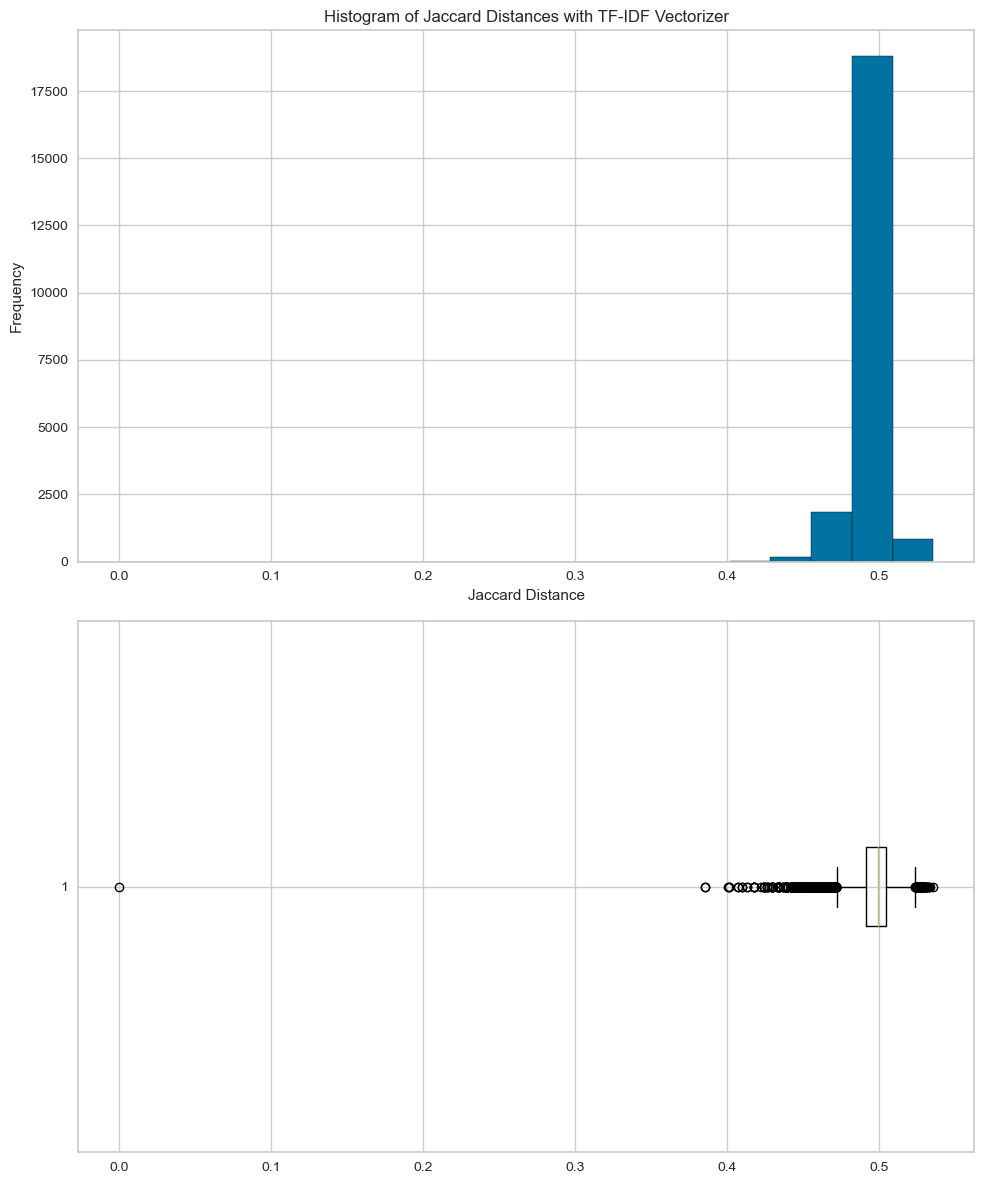

In [145]:
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Histogram and boxplot showing the distribution of Jaccard distance values
ax[0].hist(distance_matrix, bins=20, edgecolor='black')
ax[0].set_title('Histogram of Jaccard Distances with TF-IDF Vectorizer')
ax[0].set_xlabel('Jaccard Distance')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)

ax[1].boxplot(distance_matrix, vert=False)
ax[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plots
plt.savefig('frequency_jaccard_tfidf.png')
plt.show()